In [1]:
import helper_tools as ht
import plume_tools as pt
import assimilation_tools as at
import numpy as np
import matplotlib.animation as animation
from IPython.display import HTML

# Main sequence

In [2]:
setting_golem = ht.SettingsGolem(settings_to_override={"gamma":1.0,"endtime":30,"radius":5,'halg':'all'})

In [3]:
nature_list,ens_list,emis_list,time_list = ht.run_with_assimilation(setting_golem)

Running model from 0 to 10
Assimilating data at time 10


/Users/drewpendergrass/Desktop/Grad school/analytic_chemDA_modelling/ToyLETKF/assimilation_tools.py:164: ComplexWarning: Casting complex values to real discards the imaginary part
  analysisEnsemble[i,:] = np.transpose(enspert).dot(WAnalysis[:,i]) +ensmean


Running model from 10 to 20
Assimilating data at time 20
Running model from 20 to 30
Assimilating data at time 30


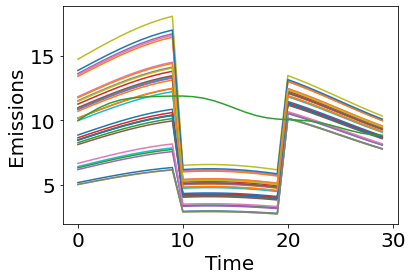

In [9]:
ht.make_emis_postprocess_plot(setting_golem,emis_list,time_list,2,2)

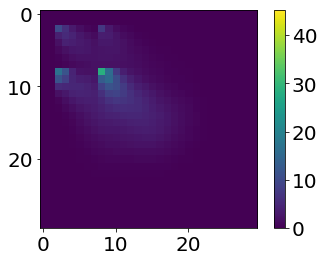

In [5]:
HTML(ht.animate_field(nature_list).to_html5_video())

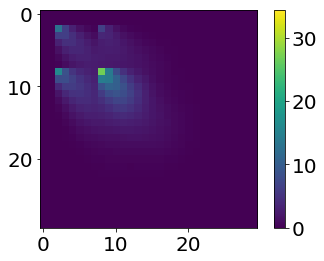

In [6]:
HTML(ht.animate_field(ens_list).to_html5_video())

# Debugging

In [ ]:
base_emis_field = setting_golem.makeBaseField()
ensfields = setting_golem.makeInitialEnsEmisFields(base_emis_field)
initial_conditions = None
tstart = 0
tend = 10

nature,ensemble,timevals = pt.compute_nature_and_ens(settings_golem=setting_golem,ens_emis_fields = ensfields,initial_conditions = initial_conditions,time_start = tstart, time_end=tend)

In [ ]:
freq_obs = setting_golem.getSetting("frequency")
obs_times = np.arange(tstart,tend,freq_obs)

assim = at.Assimilator(setting_golem,nature,ensemble,timevals, obs_times,ensfields)

In [ ]:
matchinds,matchindcolfull,matchindcolsubset = assim.getMatchInds(5,5,5)
ensmean,enspert,backgroundEnsemble,obsmean,obspert,obsdiff,obserr = assim.subsetByLoc(matchinds,5,5,5)


In [ ]:
len(obserr)

In [ ]:
analysisScalefactor = np.copy(assim.ens_pert)[:,1::2]

In [ ]:
np.shape(analysisScalefactor)

In [ ]:
analysis_std = np.std(analysisScalefactor,axis=0)

In [ ]:
np.shape(analysis_std)

In [ ]:
matchinds,matchindcolfull,matchindcolsubset = assim.getMatchInds(10,15,15)

In [ ]:
matchinds[matchinds<900]

In [ ]:
np.random.normal(0,0)

In [ ]:
import skimage.util as ski

nx_big = 90
ny_big = 10
nx_small = 2
ny_small = 2
X,Y = np.meshgrid(np.arange(nx_big),np.arange(ny_big),indexing='ij')
aggsize_x = int(nx_big/nx_small)
aggsize_y = int(ny_big/ny_small)
xinds = ski.view_as_blocks(X, (aggsize_x,aggsize_y)).mean(axis=(2,3)).flatten()
yinds = ski.view_as_blocks(Y, (aggsize_x,aggsize_y)).mean(axis=(2,3)).flatten()
def AggregateToObsGrid(observed_values):
	return ski.view_as_blocks(observed_values, (aggsize_x,aggsize_y)).mean(axis=(2,3)).flatten()

In [ ]:
np.shape(X)

In [ ]:
np.arange(nx_big)

In [ ]:
xinds

In [ ]:
yinds

In [ ]:
observed_values = np.arange(900).reshape((90,10))

In [ ]:
AggregateToObsGrid(observed_values)

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(observed_values)